## ED5005 MSC AI PROJECT

### Title: Analysis of how semantic similarity methods can be used to automatically test call routing in Interactive Voice Response Systems

### Objective: The objective of this script is to clean the IVR data in such a way it will be ready for use when modelling.

Student Name: Brian Mullins

Student Number: 19225741

In [1]:
import re
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/brian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/brian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Data Cleaning

In [2]:
#load dataset
df =pd.read_csv('ivr_english_dataset.csv', encoding='latin-1')
df

,child_id,parent_id,number,name,country_name,number_type,option,ivr_traversal,cli,call_start_time,call_connect_time,call_end_time,call_ended_by,silence_status,child_transcription,parent_transcription,description,created_on,parent_recording,child_recording
0,2_1_32,1_1_32,8008659408,Microsoft CES,United States,Toll Free,2.0,"W,4|S,3,50|D, 2|R,|W,4|S,3,50",7183541425,2017-06-29 15:20:02,2017-06-29 15:20:06,2017-06-29 15:20:56,by us,SILENCE&SILENCE,"To help us improve our quality of services, th...",Welcome to Microsoft Online Services support.,NaN,2017-06-29 15:19:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
1,3_1_32,2_1_32,8008659408,Microsoft CES,United States,Toll Free,1.0,"W,4|S,3,50|D, 2|W,4|S,3,50|D,1|R,|W,4|S,3,50",7183541425,2017-06-29 15:40:02,2017-06-29 15:40:05,2017-06-29 15:41:18,by us,SILENCE&SILENCE&SILENCE,"For technical support press 1, billing, subscr...","\nTo help us improve our quality of services, ...",NaN,2017-06-29 15:38:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
2,4_1_32,2_1_32,8008659408,Microsoft CES,United States,Toll Free,2.0,"W,4|S,3,50|D, 2|W,4|S,3,50|D,2|R,|W,4|S,3,50",7183541425,2017-06-29 15:42:02,2017-06-29 15:42:04,2017-06-29 15:43:17,by us,SILENCE&SILENCE&SILENCE,Please hold while we connect your call. (Ringi...,"\nTo help us improve our quality of services, ...",NaN,2017-06-29 15:39:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
3,5_1_32,2_1_32,8008659408,Microsoft CES,United States,Toll Free,3.0,"W,4|S,3,50|D, 2|W,4|S,3,50|D,3|R,|W,4|S,3,50",7183541425,2017-06-29 15:45:02,2017-06-29 15:45:05,2017-06-29 15:46:23,by us,SILENCE&SILENCE&SILENCE,"For technical support press 1, if you are a cl...","\nTo help us improve our quality of services, ...",NaN,2017-06-29 15:40:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
4,6_1_32,3_1_32,8008659408,Microsoft CES,United States,Toll Free,1.0,"W,4|S,3,50|D, 2|W,4|S,3,50|D,1|W,4|S,3,50|D,1|...",7183541425,2017-06-29 15:48:02,2017-06-29 15:48:05,2017-06-29 15:49:55,by us,SILENCE&SILENCE&SILENCE&SILENCE,We are currently experiencing higher than norm...,"For technical support press 1, billing, subscr...",NaN,2017-06-29 15:46:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15381,24356_1_32,24347_1_32,8502338830,IHG,United States,Toll Free,1.0,"W,4|S,3,40|D,2|W,4|S,3,40|D,2|W,4|S,3,40|D,2|W...",7183541425,2019-07-01 08:14:02,2019-07-01 08:14:07,2019-07-01 08:16:03,by us,SILENCE&SILENCE&SILENCE&SILENCE&SILENCE,Thank you for calling RCI. Your call reached u...,"For RCI, press 1. To speak to a specialist, pr...",NaN,2019-07-01 08:12:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
15382,24357_1_32,24347_1_32,8502338830,IHG,United States,Toll Free,2.0,"W,4|S,3,40|D,2|W,4|S,3,40|D,2|W,4|S,3,40|D,2|W...",7183541425,2019-07-01 08:15:02,2019-07-01 08:15:06,2019-07-01 08:17:12,by us,SILENCE&SILENCE&SILENCE&SILENCE&TIMEOUT,Thank you for calling the Holiday Inn Club Vac...,"For RCI, press 1. To speak to a specialist, pr...",NaN,2019-07-01 08:13:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
15383,24359_1_32,24346_1_32,8502338830,IHG,United States,Toll Free,2.0,"W,4|S,3,40|D,2|W,4|S,3,40|D,2|W,4|S,3,40|D,1|W...",7183541425,2019-07-01 08:17:02,2019-07-01 08:17:06,2019-07-01 08:19:21,by other party,SILENCE&SILENCE&SILENCE&TIMEOUT&SILENCE,To use the automated system through the intern...,Thank you for calling Orange Lake Capital Mana...,NaN,2019-07-01 08:15:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
15384,24362_1_32,23512_2_32,9013626200,IHG,United 

<AxesSubplot:>

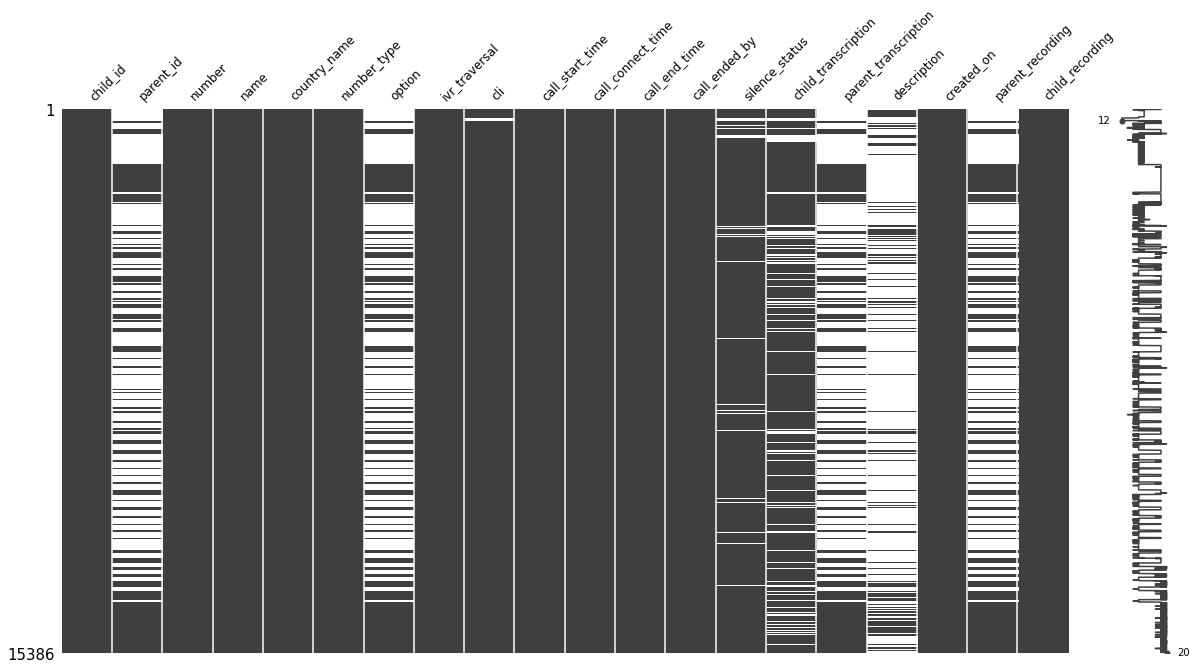

In [3]:
msno.matrix(df, figsize=(20, 10), fontsize=12)

<AxesSubplot:>

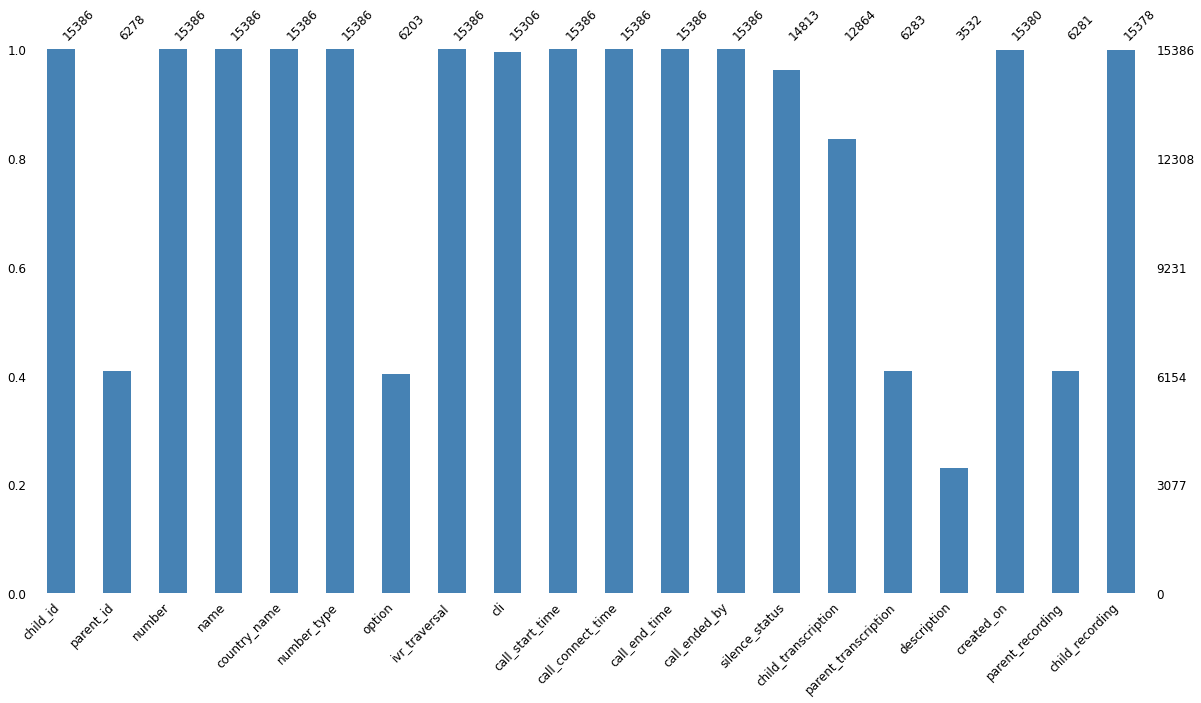

In [4]:
msno.bar(df, figsize=(20, 10), fontsize=12, color='steelblue')

In [5]:
#Removed all entries with no parent id - Missing not at random (MNAR)
df_clean = df[df['parent_id'].notna()]
df_clean

,child_id,parent_id,number,name,country_name,number_type,option,ivr_traversal,cli,call_start_time,call_connect_time,call_end_time,call_ended_by,silence_status,child_transcription,parent_transcription,description,created_on,parent_recording,child_recording
0,2_1_32,1_1_32,8008659408,Microsoft CES,United States,Toll Free,2.0,"W,4|S,3,50|D, 2|R,|W,4|S,3,50",7183541425,2017-06-29 15:20:02,2017-06-29 15:20:06,2017-06-29 15:20:56,by us,SILENCE&SILENCE,"To help us improve our quality of services, th...",Welcome to Microsoft Online Services support.,NaN,2017-06-29 15:19:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
1,3_1_32,2_1_32,8008659408,Microsoft CES,United States,Toll Free,1.0,"W,4|S,3,50|D, 2|W,4|S,3,50|D,1|R,|W,4|S,3,50",7183541425,2017-06-29 15:40:02,2017-06-29 15:40:05,2017-06-29 15:41:18,by us,SILENCE&SILENCE&SILENCE,"For technical support press 1, billing, subscr...","\nTo help us improve our quality of services, ...",NaN,2017-06-29 15:38:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
2,4_1_32,2_1_32,8008659408,Microsoft CES,United States,Toll Free,2.0,"W,4|S,3,50|D, 2|W,4|S,3,50|D,2|R,|W,4|S,3,50",7183541425,2017-06-29 15:42:02,2017-06-29 15:42:04,2017-06-29 15:43:17,by us,SILENCE&SILENCE&SILENCE,Please hold while we connect your call. (Ringi...,"\nTo help us improve our quality of services, ...",NaN,2017-06-29 15:39:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
3,5_1_32,2_1_32,8008659408,Microsoft CES,United States,Toll Free,3.0,"W,4|S,3,50|D, 2|W,4|S,3,50|D,3|R,|W,4|S,3,50",7183541425,2017-06-29 15:45:02,2017-06-29 15:45:05,2017-06-29 15:46:23,by us,SILENCE&SILENCE&SILENCE,"For technical support press 1, if you are a cl...","\nTo help us improve our quality of services, ...",NaN,2017-06-29 15:40:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
4,6_1_32,3_1_32,8008659408,Microsoft CES,United States,Toll Free,1.0,"W,4|S,3,50|D, 2|W,4|S,3,50|D,1|W,4|S,3,50|D,1|...",7183541425,2017-06-29 15:48:02,2017-06-29 15:48:05,2017-06-29 15:49:55,by us,SILENCE&SILENCE&SILENCE&SILENCE,We are currently experiencing higher than norm...,"For technical support press 1, billing, subscr...",NaN,2017-06-29 15:46:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15381,24356_1_32,24347_1_32,8502338830,IHG,United States,Toll Free,1.0,"W,4|S,3,40|D,2|W,4|S,3,40|D,2|W,4|S,3,40|D,2|W...",7183541425,2019-07-01 08:14:02,2019-07-01 08:14:07,2019-07-01 08:16:03,by us,SILENCE&SILENCE&SILENCE&SILENCE&SILENCE,Thank you for calling RCI. Your call reached u...,"For RCI, press 1. To speak to a specialist, pr...",NaN,2019-07-01 08:12:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
15382,24357_1_32,24347_1_32,8502338830,IHG,United States,Toll Free,2.0,"W,4|S,3,40|D,2|W,4|S,3,40|D,2|W,4|S,3,40|D,2|W...",7183541425,2019-07-01 08:15:02,2019-07-01 08:15:06,2019-07-01 08:17:12,by us,SILENCE&SILENCE&SILENCE&SILENCE&TIMEOUT,Thank you for calling the Holiday Inn Club Vac...,"For RCI, press 1. To speak to a specialist, pr...",NaN,2019-07-01 08:13:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
15383,24359_1_32,24346_1_32,8502338830,IHG,United States,Toll Free,2.0,"W,4|S,3,40|D,2|W,4|S,3,40|D,2|W,4|S,3,40|D,1|W...",7183541425,2019-07-01 08:17:02,2019-07-01 08:17:06,2019-07-01 08:19:21,by other party,SILENCE&SILENCE&SILENCE&TIMEOUT&SILENCE,To use the automated system through the intern...,Thank you for calling Orange Lake Capital Mana...,NaN,2019-07-01 08:15:00,https://new-call-recordings.s3.amazonaws.com/d...,https://new-call-recordings.s3.amazonaws.com/d...
15384,24362_1_32,23512_2_32,9013626200,IHG,United 

<AxesSubplot:>

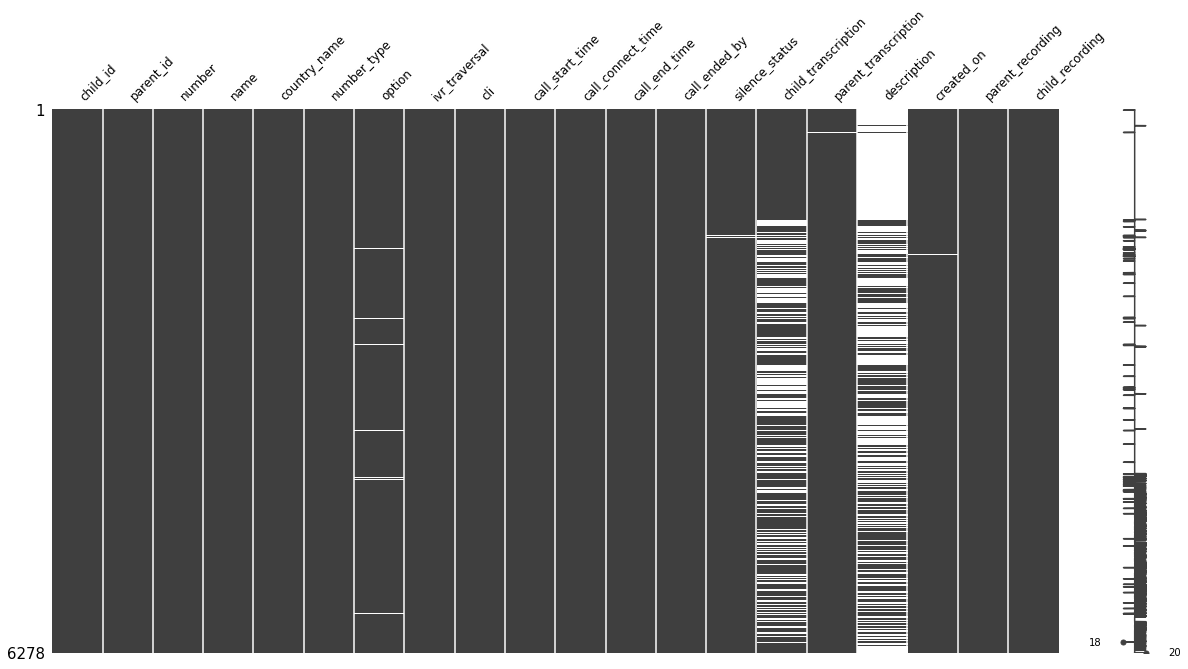

In [6]:
msno.matrix(df_clean, figsize=(20, 10), fontsize=12)

In [7]:
#Values with description = null are tests with no issues so imputated these as “Connected” description
df_clean['description'].fillna('Connected', inplace = True)

/home/brian/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<AxesSubplot:>

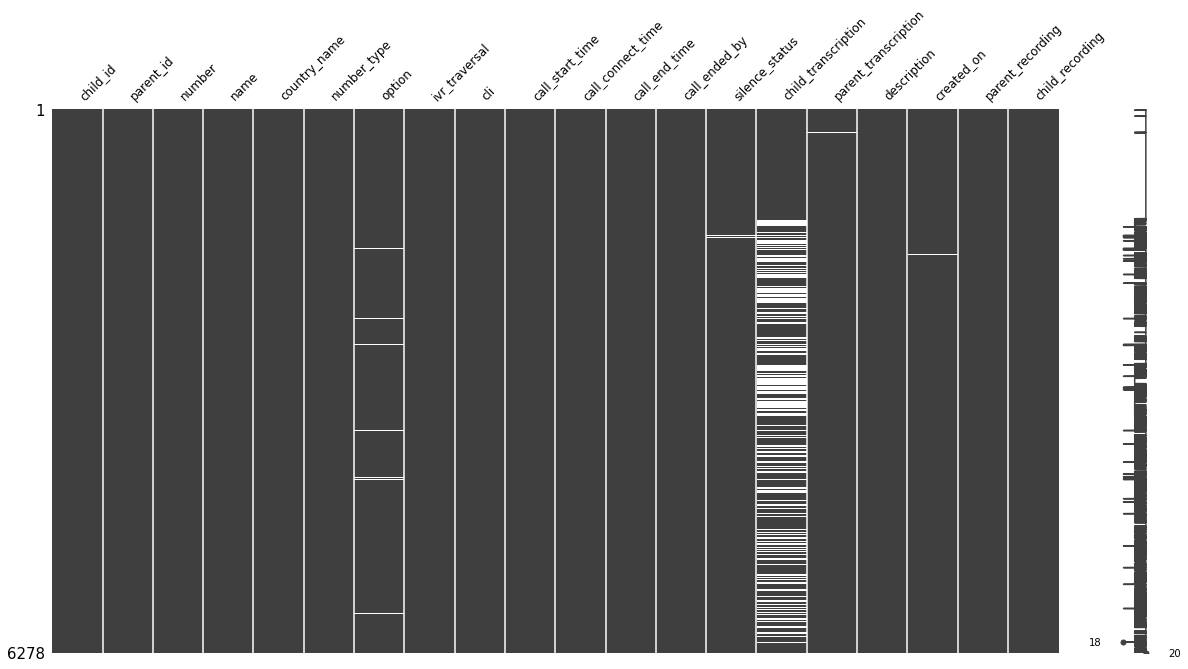

In [8]:
msno.matrix(df_clean, figsize=(20, 10), fontsize=12)

In [9]:
#remove transcriptions from different languages and kept only english transcriptions


<AxesSubplot:>

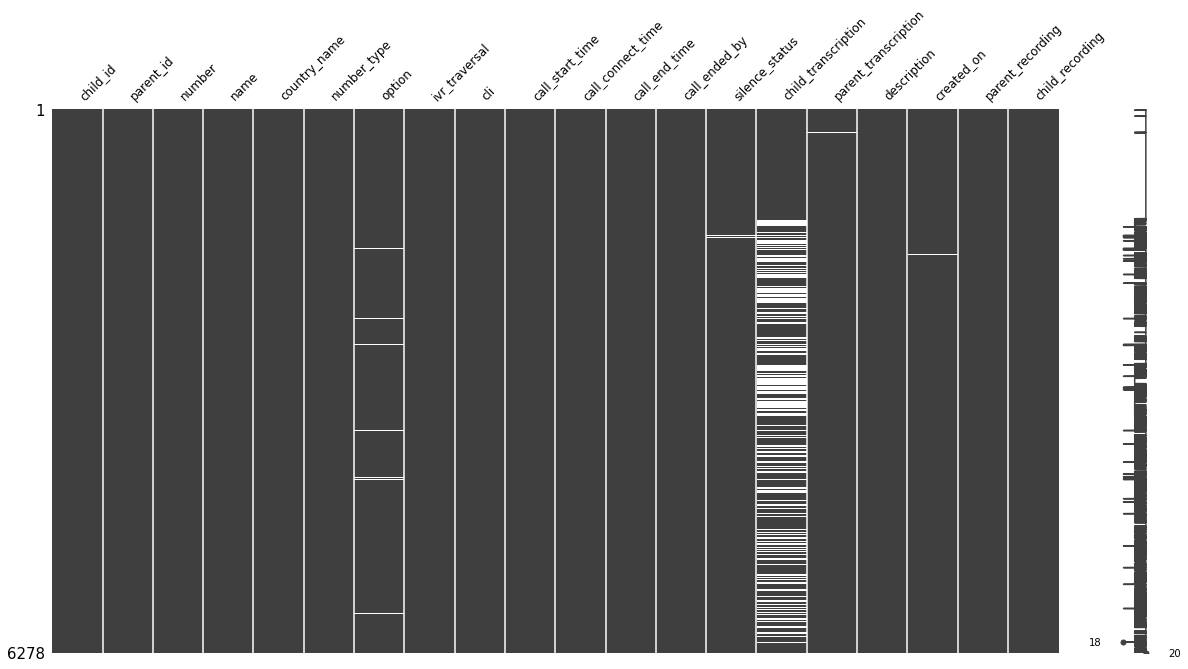

In [10]:
msno.matrix(df_clean, figsize=(20, 10), fontsize=12)

In [11]:
#Remove any duplicate rows that had same child and parent transcriptions
df_clean = df_clean.drop_duplicates(subset=['child_transcription', 'parent_transcription'], keep='last')

<AxesSubplot:>

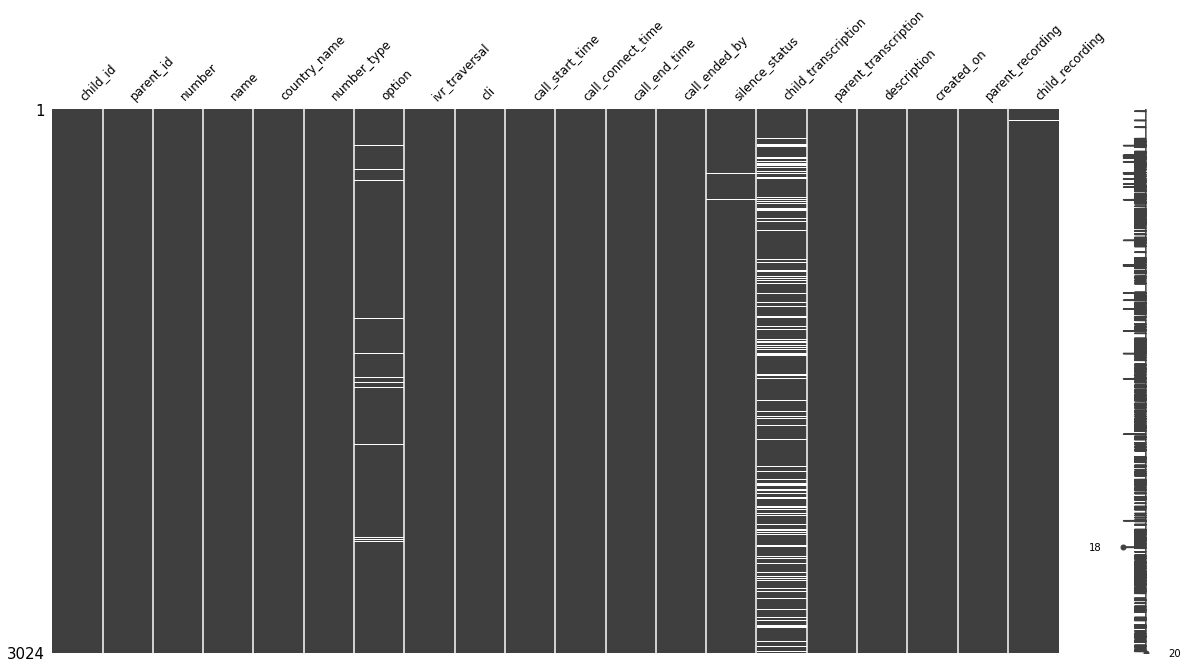

In [12]:
msno.matrix(df_clean, figsize=(20, 10), fontsize=12)

In [13]:
df_clean = df_clean[df_clean['option'].notna()]

<AxesSubplot:>

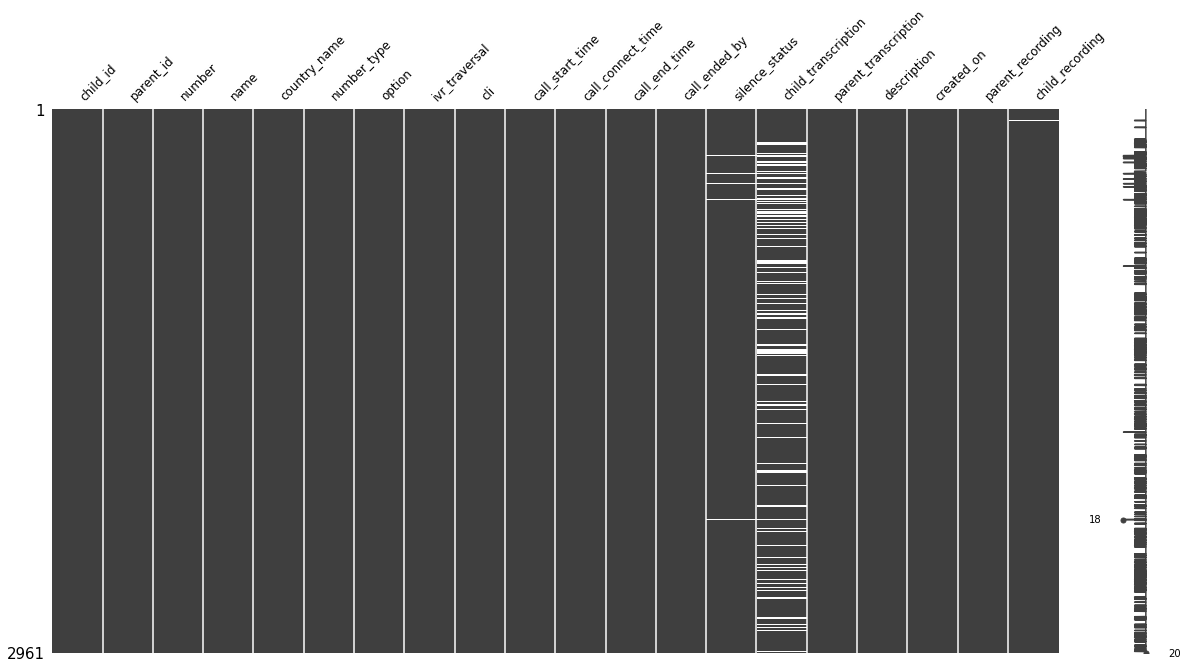

In [14]:
msno.matrix(df_clean, figsize=(20, 10), fontsize=12)

In [15]:
#cleaning up null values in child and parent transcriptions
df_clean = df_clean[df_clean['child_transcription'].notna()]
df_clean = df_clean[df_clean['parent_transcription'].notna()]
df_clean = df_clean[df_clean['child_recording'].notna()]
df_clean = df_clean[df_clean['parent_recording'].notna()]

<AxesSubplot:>

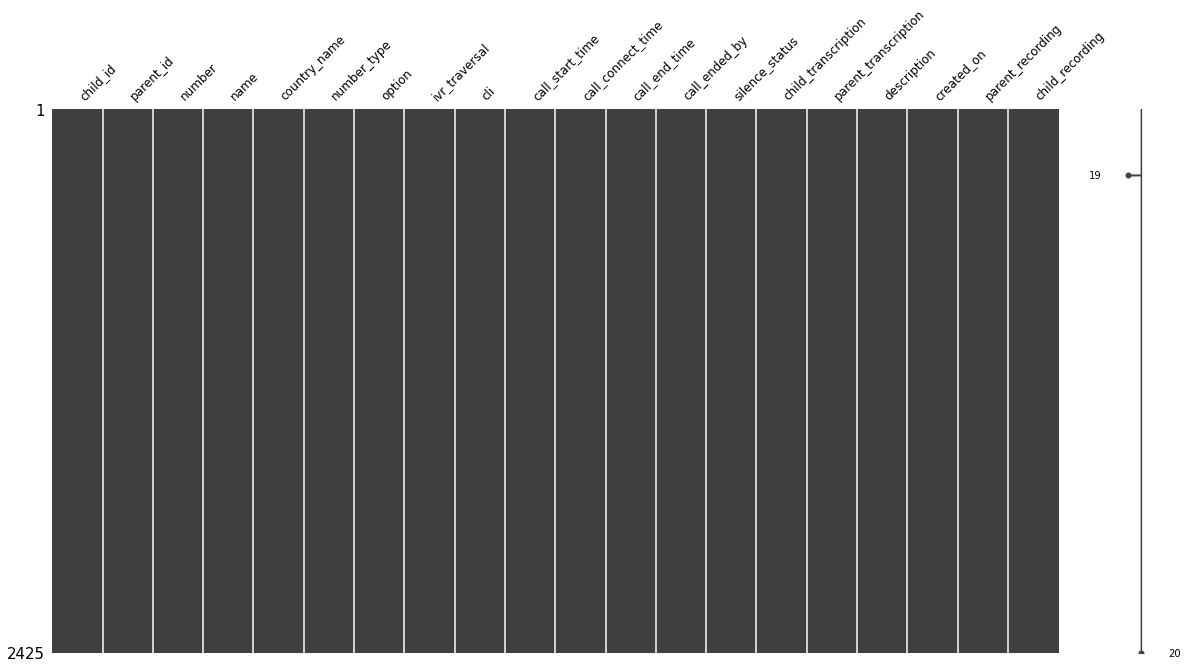

In [16]:
msno.matrix(df_clean, figsize=(20, 10), fontsize=12)

### Data Preparation

In [17]:
#Feature selection - Selected child_id, option, child_transcription and parent transcription features only as these are what we will use to carry out the semantic similarity methods on.
df_new = df_clean[["child_id", "option","child_transcription", 'parent_transcription']]

In [18]:
df_new

,child_id,option,child_transcription,parent_transcription
0,2_1_32,2.0,"To help us improve our quality of services, th...",Welcome to Microsoft Online Services support.
1,3_1_32,1.0,"For technical support press 1, billing, subscr...","\nTo help us improve our quality of services, ..."
2,4_1_32,2.0,Please hold while we connect your call. (Ringi...,"\nTo help us improve our quality of services, ..."
3,5_1_32,3.0,"For technical support press 1, if you are a cl...","\nTo help us improve our quality of services, ..."
4,6_1_32,1.0,We are currently experiencing higher than norm...,"For technical support press 1, billing, subscr..."
...,...,...,...,...
15381,24356_1_32,1.0,Thank you for calling RCI. Your call reached u...,"For RCI, press 1. To speak to a specialist, pr..."
15382,24357_1_32,2.0,Thank you for calling the Holiday Inn Club Vac...,"For RCI, press 1. To speak to a specialist, pr..."
15383,24359_1_32,2.0,To use the automated system through the intern...,Thank you for calling Orange Lake Capital Mana...
15384,24362_1_32,1.0,Please enter your preferred 10 digit call back...,"Please hold. To ensure high quality service, y..."


In [19]:
#lowercase child and parent transcriptions 
df_new.apply(lambda x: x.astype(str).str.lower())

,child_id,option,child_transcription,parent_transcription
0,2_1_32,2.0,"to help us improve our quality of services, th...",welcome to microsoft online services support.
1,3_1_32,1.0,"for technical support press 1, billing, subscr...","\nto help us improve our quality of services, ..."
2,4_1_32,2.0,please hold while we connect your call. (ringi...,"\nto help us improve our quality of services, ..."
3,5_1_32,3.0,"for technical support press 1, if you are a cl...","\nto help us improve our quality of services, ..."
4,6_1_32,1.0,we are currently experiencing higher than norm...,"for technical support press 1, billing, subscr..."
...,...,...,...,...
15381,24356_1_32,1.0,thank you for calling rci. your call reached u...,"for rci, press 1. to speak to a specialist, pr..."
15382,24357_1_32,2.0,thank you for calling the holiday inn club vac...,"for rci, press 1. to speak to a specialist, pr..."
15383,24359_1_32,2.0,to use the automated system through the intern...,thank you for calling orange lake capital mana...
15384,24362_1_32,1.0,please enter your preferred 10 digit call back...,"please hold. to ensure high quality service, y..."


In [20]:
#Identify the intent on each parent transcription and create intent features based on option value - 
# 926 intents/utterances using generic regex expression - if option selected = 1 then (.*)(?=press [option selected]) else (?<=press [previous option])(.*)(?=press [option selected])
for index, row in df_new.iterrows():
    intent = None
    #print(row['parent_transcription'])
    sentences = row['parent_transcription'].split(".")
    #print(sentences)
    for sentence in sentences:
        #check if press is in sentence then we know its the IVR menu
        if 'press' in sentence:
            if(int(row['option'])==1):
                #print()
                intent = re.search(r"(.*)(?=press 1)",str(sentence))
                #df_new['intent'] =
            else:
                option = int(row['option'])
                previous_option = int(option) - 1
                intent = re.search(r"(?<=press "+ str(previous_option) +")(.*)(?=press " + str(option) + ")",str(sentence))
        
        if intent:
            clean_intent = intent.group(1).replace(",","").lstrip()
            print(clean_intent)
            df_new.loc[index, 'intent'] = clean_intent

For technical support 
For technical support 
billing subscriptions or activation 
billing subscriptions or activation 
sales or to extend a trial 
sales or to extend a trial 
cancel a subscription 
cancel a subscription 
For technical support 
if you are a cloud solution provider or online services adviser and have questions related to the Microsoft partner network like benefits enrollment requirements assistance with sales or customer quotes fee payments dashboard or internal use rights 
for all other partners who have questions regarding billing subscription or activation questions on behalf of your customer 
If you are trying to reach Adobe customer service or tech support 
If you are trying to reach Adobe customer service or tech support 
If you are trying to reach Adobe customer service or tech support 
For help with billing questionspayment account management redemption codesor help with your Adobe ID 
For help downloading installing and activating your product including mobile 

/home/brian/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/brian/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)



To disconnect 
To disconnect 
The number you have dialed is no longer in use although if you need to make or change a reservation please 
The number you have dialed is no longer in use although if you need to make or change a reservation please 
The number you have dialed is no longer in use although if you need to make or change a reservation please 
The number you have dialed is no longer in use although if you need to make or change a reservation please 
The number you have dialed is no longer in use although if you need to make or change a reservation please 
The number you have dialed is no longer in use although if you need to make or change a reservation please 
The number you have dialed is no longer in use although if you need to make or change a reservation please 
The number you have dialed is no longer in use although if you need to make or change a reservation please 
For reward night reservations 
Or if you'd like to leave a message now 
To help improve your experience w

If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
To help improve your experience would you like to take a 2 question survey at the end of this call? If yes 
To help improve your experience would you like to take a 2 question survey at the end of this call? If yes 
For password issues please 
For concerto or moment support please 
To make a bedroom reservation 
To make a bedroom reservation 
To make a bedroom reservation 
To make a bedroom reservation 
for IHG rewards club; 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night ple

If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please say reservations or 
If you are calling about a reservation or a reward night please s

The number you have dialed is no longer in use although if you need to make or change a reservation please 
The number you have dialed is no longer in use although if you need to make or change a reservation please 
The number you have dialed is no longer in use although if you need to make or change a reservation please 
The number you have dialed is no longer in use although if you need to make or change a reservation please 
For reservations including reward night 
Making arrangements to stay and play 
Making arrangements to stay and play 
Making arrangements to stay and play 
Making arrangements to stay and play 
Making arrangements to stay and play 
Making arrangements to stay and play 
To help improve your experience would you like to take a 2 question survey at the end of this call? If yes 
To help improve your experience would you like to take a 2 question survey at the end of this call? If yes 
To help improve your experience would you like to take a 2 question survey at the e

If you would like to speak with guest services please 
For reservations 
For hotel reservations 
For our general manager 
For reservations please 
For reservations please 
For reservations please 
If you wish to make a reservation 
To make change or cancel a reservations 
If you've purchased a Holiday Inn Club Vacations getaway package and have questions or would like to select your vacation dates 
For reservations please 
If you would like to make a reservation 
If you would like to book a reservation or reach RCI for holiday and club vacations Hill Country Resort please 
If you would like to make or change a reservation please 
For reservations please 
For guest room reservations please 
For reservations please 
To reach reservations please 
To reach a guest 
Please 
Please 
Please 
for reservations 
for reservations 
for reservations 
If you're looking to make a future reservation please 
For reservations 
To reach a guest room 
If you are calling for reservations please 
If you wou

<AxesSubplot:>

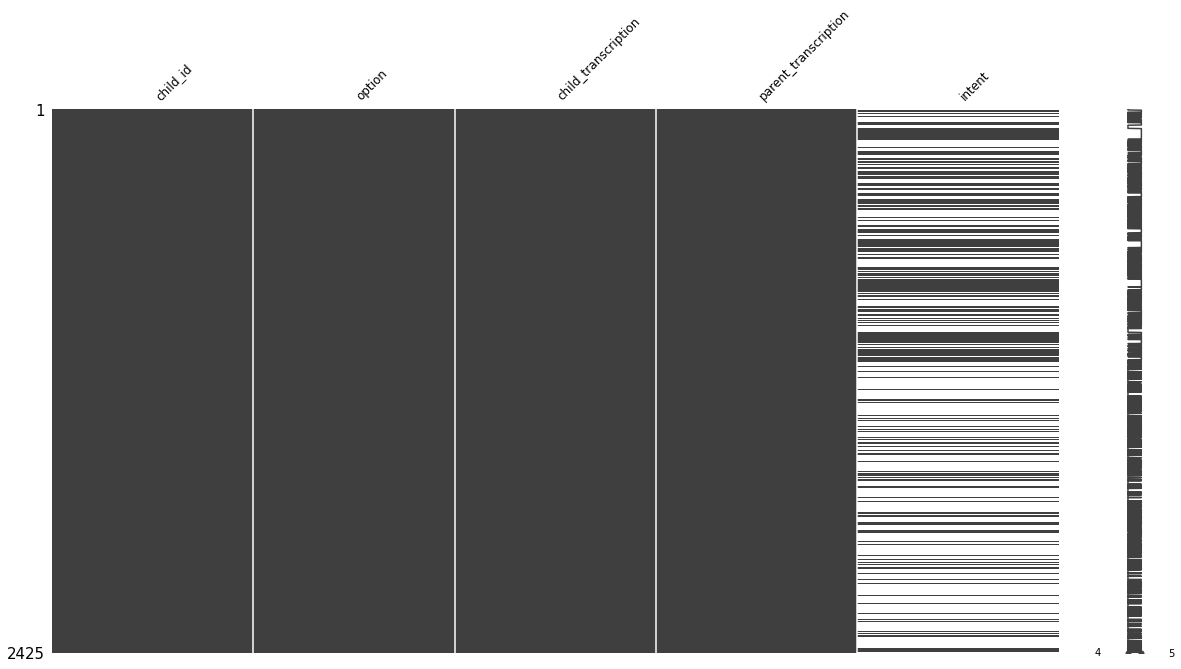

In [21]:
msno.matrix(df_new, figsize=(20, 10), fontsize=12)

In [22]:
df_new = df_new[df_new['intent'].notna()]

<AxesSubplot:>

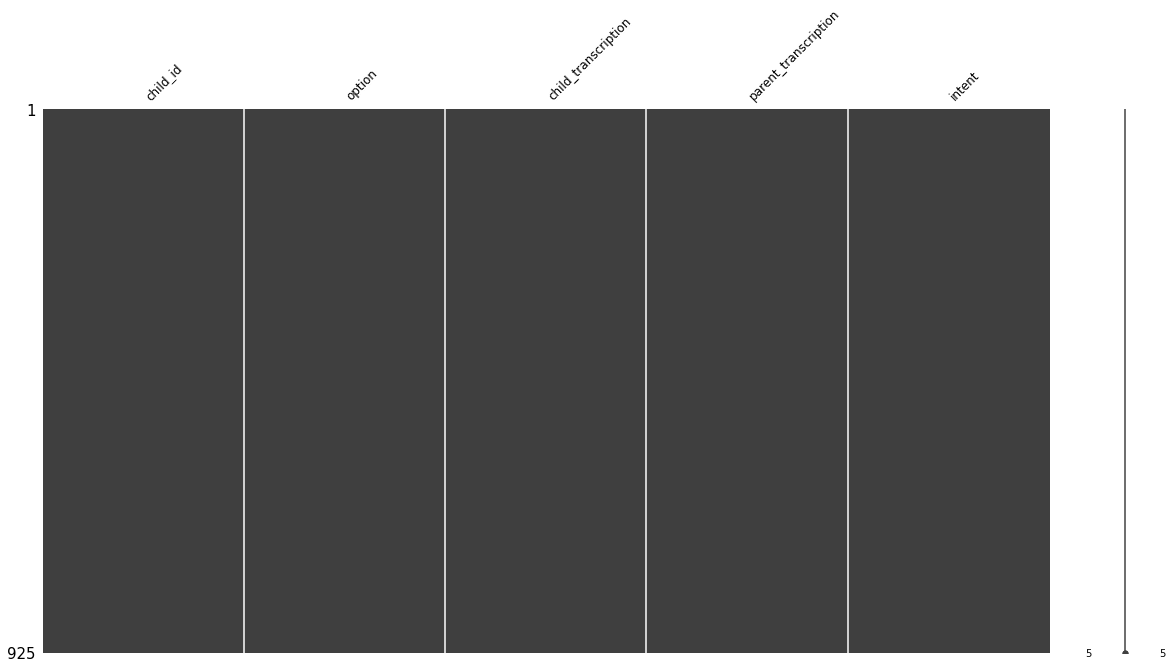

In [23]:
msno.matrix(df_new, figsize=(20, 10), fontsize=12)

In [24]:
df_new

,child_id,option,child_transcription,parent_transcription,intent
4,6_1_32,1.0,We are currently experiencing higher than norm...,"For technical support press 1, billing, subscr...",For technical support
5,7_1_32,2.0,Please hold while we connect your call. (Music...,"For technical support press 1, billing, subscr...",billing subscriptions or activation
6,8_1_32,3.0,Please hold while we connect your call.\n\n,"For technical support press 1, billing, subscr...",sales or to extend a trial
7,9_1_32,4.0,Please hold while we connect your call. (Music...,"For technical support press 1, billing, subscr...",cancel a subscription
8,10_1_32,1.0,We are currently experiencing higher than norm...,"For technical support press 1, if you are a cl...",For technical support
...,...,...,...,...,...
15371,24344_1_32,1.0,Follow Pena Boulevard out of the airport towar...,The quickest route to our hotel from Denver In...,For these directions please
15373,24346_1_32,1.0,Thank you for calling Orange Lake Capital Mana...,"To make a loan, maintenance or club dues payme...",To make a loan maintenance or club dues payment
15379,24354_1_32,1.0,Thank you for calling RCI. Your call reached u...,"For RCI, press 1. To speak to a specialist, pr...",For RCI
15381,24356_1_32,1.0,Thank you for calling RCI. Your call reached u...,"For RCI, press 1. To speak to a specialist, pr...",For RCI


In [25]:
#Removed stopwords from both intent and child transcription
df_new['child_transcription_without_stopwords'] = df_new['child_transcription'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_new['intent_without_stopwords'] = df_new['intent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


<ipython-input-25-81dfc82125c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['child_transcription_without_stopwords'] = df_new['child_transcription'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
<ipython-input-25-81dfc82125c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['intent_without_stopwords'] = df_new['intent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [26]:
df_new

,child_id,option,child_transcription,parent_transcription,intent,child_transcription_without_stopwords,intent_without_stopwords
4,6_1_32,1.0,We are currently experiencing higher than norm...,"For technical support press 1, billing, subscr...",For technical support,We currently experiencing higher normal call v...,For technical support
5,7_1_32,2.0,Please hold while we connect your call. (Music...,"For technical support press 1, billing, subscr...",billing subscriptions or activation,Please hold connect call. (Music hold Ringing)...,billing subscriptions activation
6,8_1_32,3.0,Please hold while we connect your call.\n\n,"For technical support press 1, billing, subscr...",sales or to extend a trial,Please hold connect call.,sales extend trial
7,9_1_32,4.0,Please hold while we connect your call. (Music...,"For technical support press 1, billing, subscr...",cancel a subscription,Please hold connect call. (Music hold Ringing)...,cancel subscription
8,10_1_32,1.0,We are currently experiencing higher than norm...,"For technical support press 1, if you are a cl...",For technical support,We currently experiencing higher normal call v...,For technical support
...,...,...,...,...,...,...,...
15371,24344_1_32,1.0,Follow Pena Boulevard out of the airport towar...,The quickest route to our hotel from Denver In...,For these directions please,Follow Pena Boulevard airport towards toll roa...,For directions please
15373,24346_1_32,1.0,Thank you for calling Orange Lake Capital Mana...,"To make a loan, maintenance or club dues payme...",To make a loan maintenance or club dues payment,"Thank calling Orange Lake Capital Management, ...",To make loan maintenance club dues payment
15379,24354_1_32,1.0,Thank you for calling RCI. Your call reached u...,"For RCI, press 1. To speak to a specialist, pr...",For RCI,Thank calling RCI. Your call reached us hours ...,For RCI
15381,24356_1_32,1.0,Thank you for calling RCI. Your call reached u...,"For RCI, press 1. To speak to a specialist, pr...",For RCI,Thank calling RCI. Your call reached us hours ...,For RCI


In [27]:
#save cleaned data to csv
df_new.to_csv('clean_ivr_data.csv')